In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [65]:
data= pd.read_csv("winemag-data_first150k.csv", index_col=0)
data.head()
#print(data.describe())

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Objectives

_Basic data exploration_

_Determine wine with the best point to price ratio_

_Visualise distribution of points across the dataset_

_Visualise distribution of prices across the dataset_

_Visualise relationship betweeen the price and points_

_Determine the most common wine varieties_

_Determine the most producing wine countries_

_Determine countries with the highest wine ratings_

_Determine countries with the most expensive wine_


In [ ]:
#Basic data exxploration
def exploration(data):
    explore= pd.DataFrame(data.dtypes, columns=['dtypes'])
    explore.reset_index(inplace=True)
    explore['Name'] = explore['index']
    explore= explore[['Name', 'dtypes']]
    explore['Missing values'] = data.isna().sum().values
    explore['Unique']= data.nunique().values
    explore['First value']= data.loc[0].values
    explore['Second value']= data.loc[1].values
    explore['Third value']= data.loc[2].values

    #Calculating the entropy
    for name in explore['Name'].value_counts().index:
        explore.loc[explore['Name'] == name, 'Entropy'] = round(stats.entropy(data[name].value_counts(normalize=True), base=2),2) 

    return explore

explore = exploration(data) 
explore

,Name,dtypes,Missing values,Unique,First value,Second value,Third value,Entropy
0,country,object,5,48,US,Spain,US,2.86
1,description,object,0,97821,This tremendous 100% varietal wine hails from ...,"Ripe aromas of fig, blackberry and cassis are ...",Mac Watson honors the memory of a wine once ma...,16.43
2,designation,object,45735,30621,Martha's Vineyard,Carodorum Selección Especial Reserva,Special Selected Late Harvest,13.38
3,points,int64,0,21,96,96,96,3.72
4,price,float64,13695,357,235.0,110.0,90.0,5.73
5,province,object,5,455,California,Northern Spain,California,5.00
6,region_1,object,25060,1236,Napa Valley,Toro,Knights Valley,7.81
7,region_2,object,89977,18,Napa,NaN,Sonoma,3.31
8,variety,object,0,632,Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,5.58
9,winery,object,0,14810,Heitz,Bodega Carmen Rodríguez,Macauley,12.74


In [ ]:
#Determining the point to price ratio
data['p_to_p_ratio']= data['points']/ data['price']
best_choice_col= data.loc[data['p_to_p_ratio'].idxmax()]
best_choice_val= data.loc[data['p_to_p_ratio'].idxmax(), 'p_to_p_ratio']
best_choice_val

np.float64(21.5)

Text(0, 0.5, 'Frequency')

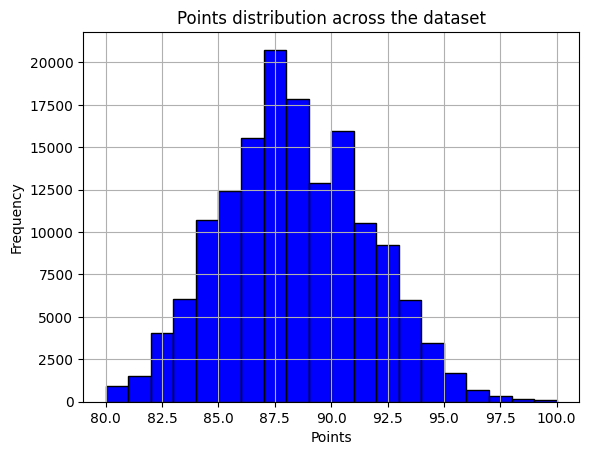

In [111]:
#Points distribution across the dataset
plt.figure()
data['points'].dropna().hist(bins=20, color='blue', edgecolor='black')
plt.title("Points distribution across the dataset")
plt.xlabel("Points")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

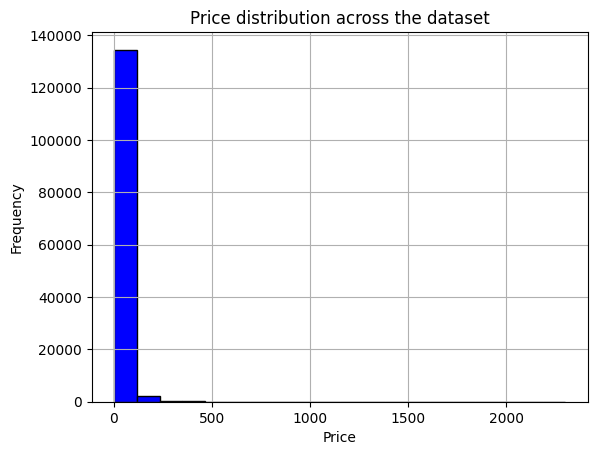

In [112]:
#Price distribution across the dataset
plt.figure()
data['price'].dropna().hist(bins=20, color='blue', edgecolor='black')
plt.title("Price distribution across the dataset")
plt.xlabel('Price')
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

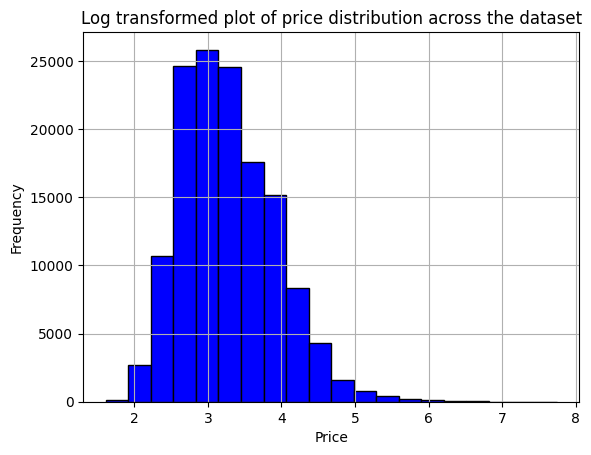

In [ ]:
#Since the price values are too close, I'll perform a log transformation
plt.figure()
data['log_price']= np.log1p(data['price'])
data['log_price'].dropna().hist(bins=20, color='blue', edgecolor='black')
plt.title("Log transformed plot of price distribution across the dataset")
plt.xlabel("Price")
plt.ylabel("Frequency")

Text(0, 0.5, 'Wine Rating(Points)')

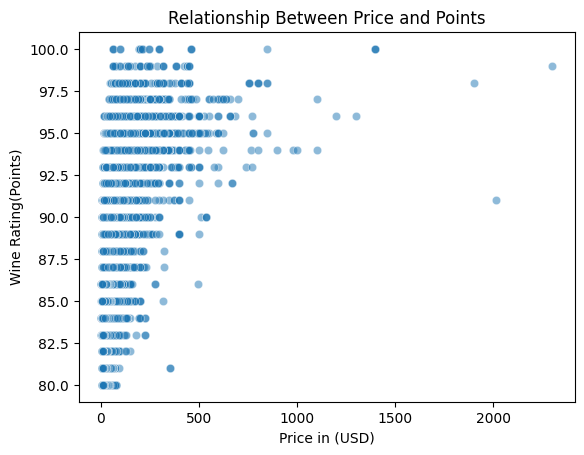

In [136]:
#Relationship between the price and points 
#Scatter plot visualisation
plt.figure()
sns.scatterplot(x='price', y='points', data=data, alpha=0.5)
plt.title('Relationship Between Price and Points')
plt.xlabel("Price in (USD)")
plt.ylabel("Wine Rating(Points)")

Text(0, 0.5, 'Wine Rating(Points)')

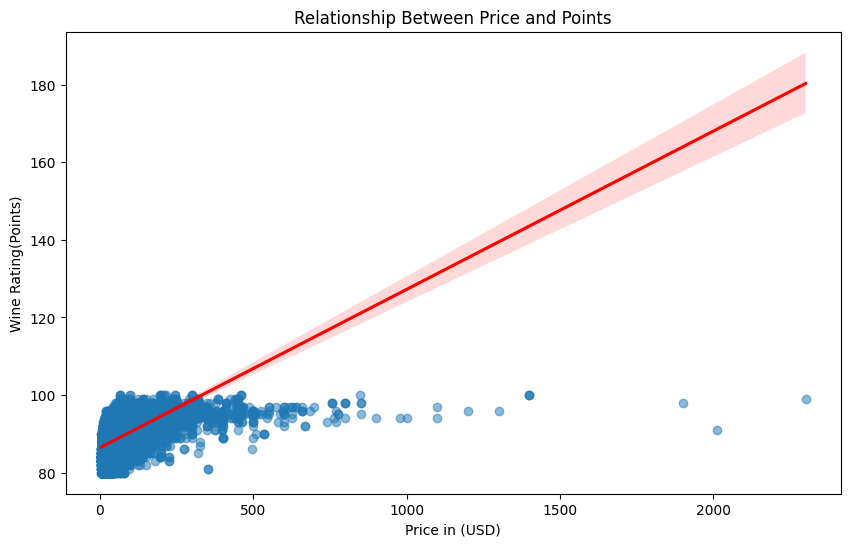

In [ ]:
#Relationship between the price and points 
#Trendline for scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x= 'price', y='points', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'} )
plt.title("Relationship Between Price and Points")
plt.xlabel("Price in (USD)")
plt.ylabel("Wine Rating(Points)")

variety
Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Carignan-Syrah                  1
Premsal                         1
Muskat                          1
Syrah-Carignan                  1
Carnelian                       1
Name: count, Length: 632, dtype: int64


Text(0, 0.5, 'Count')

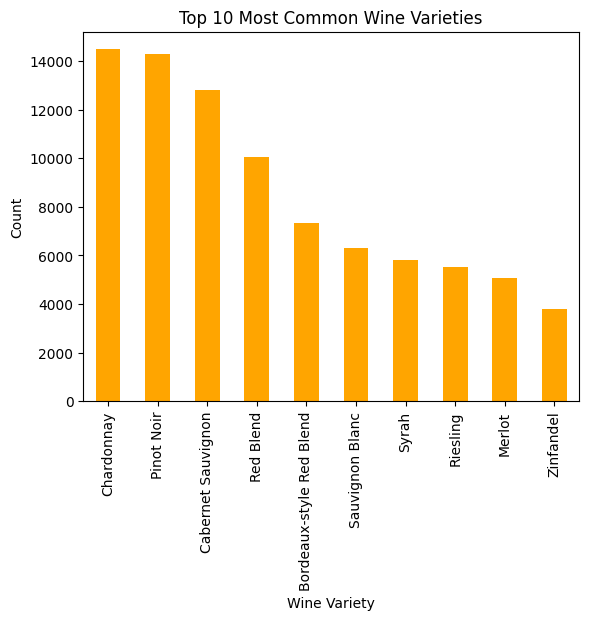

In [120]:
#Determining the most common wine varieties
wine_counts = data['variety'].value_counts()
print(wine_counts)

#I'll make a plot to show the variety distributions(First 10)
wine_counts[:10].plot(kind='bar', color='orange')
plt.title("Top 10 Most Common Wine Varieties")
plt.xlabel("Wine Variety")
plt.ylabel("Count")

Text(0, 0.5, 'Counts')

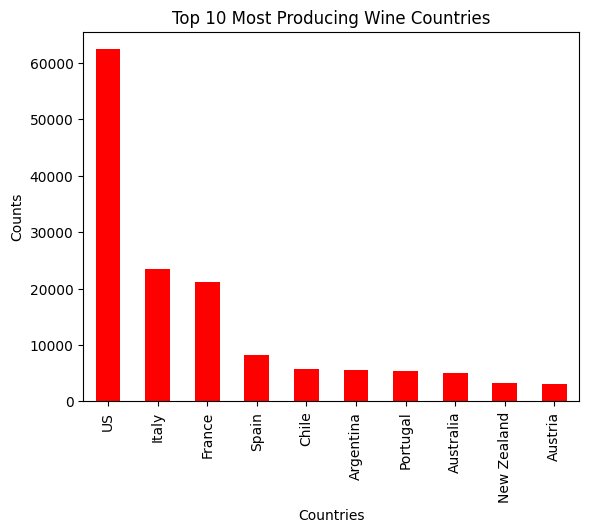

In [122]:
#Most Producing Wine Countries
countries= data['country'].value_counts()
countries[:10].plot(kind='bar', color='red')
plt.title("Top 10 Most Producing Wine Countries")
plt.xlabel("Countries")
plt.ylabel("Counts")

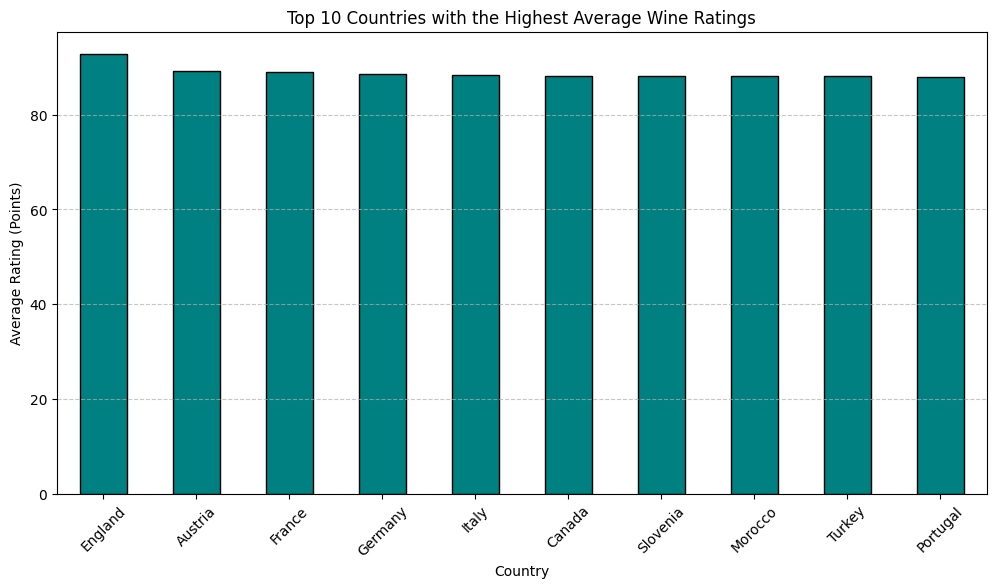

In [135]:
#Distribution by countries with the highest ratings
plt.figure(figsize=(12, 6))
country_ratings = data.groupby('country')['points'].mean().sort_values(ascending=False).head(10)
country_ratings.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 10 Countries with the Highest Average Wine Ratings')
plt.xlabel('Country')
plt.ylabel('Average Rating (Points)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
